In [63]:
import torch
import torchvision
import os, time, tqdm
from models.cvae2 import loss, cVAE
from utils import EarlyStop
from datasets import celeba
from matplotlib import pyplot as plt
from datasets.inpainting import DeleteRandomRectangle, DeleteRectangle

In [64]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [65]:
def crop(x, low, high):
    x[x <= low] = low
    x[x >= high] = high
    return x

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x: crop(x, 0., 1.)),
    torchvision.transforms.Resize((109, 89), antialias=True),  # (3, 218, 178) -> (3, 109, 89)
    torchvision.transforms.CenterCrop((64, 64)),
])

train_data = celeba.CelebA(root='C:/Datasets/', download=False, transform=transform)


In [66]:
baseline = cVAE((3, 64, 64), 2, nhid=512, ncond=16)
checkpoint = torch.load("./models/weights/cVAE.pt", map_location=device)
baseline.load_state_dict(checkpoint["net"])
baseline.to(device)
baseline.eval()

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2))
      (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
      (9): Conv2d(256, 512, kernel_size=(5, 5), stride=(2, 2))
      (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): ReLU(inplace=True)
      (12): Flatten()
    )
    (calc_mean): MLP(
      (mlp): Sequential(
        (Linear_0): Linear(in_features=512, out_features=512, bias=True)
      )
    )
    (calc_logvar): MLP(
      (mlp): Sequential

In [67]:
fineTuned = cVAE((3, 64, 64), 2, nhid=512, ncond=16)
checkpoint = torch.load("./models/weights/smiling-cVAE-finetuned.pt", map_location=device)
fineTuned.load_state_dict(checkpoint["net"])
fineTuned.to(device)
fineTuned.eval()

RuntimeError: Error(s) in loading state_dict for cVAE:
	Missing key(s) in state_dict: "encoder.encode.6.weight", "encoder.encode.6.bias", "encoder.encode.7.running_mean", "encoder.encode.7.running_var", "encoder.encode.9.weight", "encoder.encode.9.bias", "encoder.encode.10.running_mean", "encoder.encode.10.running_var", "decoder.main.2.weight", "decoder.main.2.bias", "decoder.main.2.running_mean", "decoder.main.2.running_var". 
	Unexpected key(s) in state_dict: "encoder.encode.15.mlp.Linear_0.weight", "encoder.encode.15.mlp.Linear_0.bias", "encoder.encode.15.mlp.BatchNorm_0.weight", "encoder.encode.15.mlp.BatchNorm_0.bias", "encoder.encode.15.mlp.BatchNorm_0.running_mean", "encoder.encode.15.mlp.BatchNorm_0.running_var", "encoder.encode.15.mlp.BatchNorm_0.num_batches_tracked", "encoder.encode.15.mlp.Linear_1.weight", "encoder.encode.15.mlp.Linear_1.bias", "encoder.encode.15.mlp.BatchNorm_1.weight", "encoder.encode.15.mlp.BatchNorm_1.bias", "encoder.encode.15.mlp.BatchNorm_1.running_mean", "encoder.encode.15.mlp.BatchNorm_1.running_var", "encoder.encode.15.mlp.BatchNorm_1.num_batches_tracked", "encoder.encode.8.weight", "encoder.encode.8.bias", "encoder.encode.8.running_mean", "encoder.encode.8.running_var", "encoder.encode.8.num_batches_tracked", "encoder.encode.11.weight", "encoder.encode.11.bias", "encoder.encode.11.running_mean", "encoder.encode.11.running_var", "encoder.encode.11.num_batches_tracked", "encoder.calc_mean.mlp.BatchNorm_0.weight", "encoder.calc_mean.mlp.BatchNorm_0.bias", "encoder.calc_mean.mlp.BatchNorm_0.running_mean", "encoder.calc_mean.mlp.BatchNorm_0.running_var", "encoder.calc_mean.mlp.BatchNorm_0.num_batches_tracked", "encoder.calc_mean.mlp.Linear_1.weight", "encoder.calc_mean.mlp.Linear_1.bias", "encoder.calc_logvar.mlp.BatchNorm_0.weight", "encoder.calc_logvar.mlp.BatchNorm_0.bias", "encoder.calc_logvar.mlp.BatchNorm_0.running_mean", "encoder.calc_logvar.mlp.BatchNorm_0.running_var", "encoder.calc_logvar.mlp.BatchNorm_0.num_batches_tracked", "encoder.calc_logvar.mlp.Linear_1.weight", "encoder.calc_logvar.mlp.Linear_1.bias", "decoder.main.1.weight", "decoder.main.1.bias", "decoder.main.1.running_mean", "decoder.main.1.running_var", "decoder.main.1.num_batches_tracked". 
	size mismatch for encoder.encode.0.weight: copying a param with shape torch.Size([16, 3, 5, 5]) from checkpoint, the shape in current model is torch.Size([64, 3, 5, 5]).
	size mismatch for encoder.encode.0.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.encode.1.weight: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.encode.1.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.encode.1.running_mean: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.encode.1.running_var: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.encode.3.weight: copying a param with shape torch.Size([32, 16, 5, 5]) from checkpoint, the shape in current model is torch.Size([128, 64, 5, 5]).
	size mismatch for encoder.encode.3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encode.4.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encode.4.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encode.4.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encode.4.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encode.7.weight: copying a param with shape torch.Size([64, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.encode.7.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.encode.10.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for encoder.encode.10.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for encoder.calc_mean.mlp.Linear_0.weight: copying a param with shape torch.Size([64, 128]) from checkpoint, the shape in current model is torch.Size([512, 512]).
	size mismatch for encoder.calc_mean.mlp.Linear_0.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for encoder.calc_logvar.mlp.Linear_0.weight: copying a param with shape torch.Size([64, 128]) from checkpoint, the shape in current model is torch.Size([512, 512]).
	size mismatch for encoder.calc_logvar.mlp.Linear_0.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.main.0.weight: copying a param with shape torch.Size([116, 512, 4, 4]) from checkpoint, the shape in current model is torch.Size([16384, 528]).
	size mismatch for decoder.main.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([16384]).
	size mismatch for decoder.main.3.weight: copying a param with shape torch.Size([512, 256, 4, 4]) from checkpoint, the shape in current model is torch.Size([256, 256, 2, 2]).
	size mismatch for decoder.main.6.weight: copying a param with shape torch.Size([256, 128, 4, 4]) from checkpoint, the shape in current model is torch.Size([256, 128, 2, 2]).
	size mismatch for decoder.main.9.weight: copying a param with shape torch.Size([128, 64, 4, 4]) from checkpoint, the shape in current model is torch.Size([128, 32, 2, 2]).
	size mismatch for decoder.main.9.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.main.10.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.main.10.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.main.10.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.main.10.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.main.12.weight: copying a param with shape torch.Size([64, 3, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 3, 5, 5]).

In [ ]:
def display_reconstruction(generator, img_index, label, deletion):
    img, _ = train_data[img_index]

    cropped, mask = deletion(img.unsqueeze(0))
    plt.subplot(1, 3, 1)
    plt.imshow(cropped.squeeze().permute(1,2,0))
    
    generated, _, _ = generator(cropped.to(device), torch.tensor([label], device=device))
    generated = generated.cpu().detach()
    plt.subplot(1, 3, 2)
    plt.imshow(generated.squeeze().permute(1,2,0))
    
    result = img * (1 - mask) + generated * mask
    plt.subplot(1, 3, 3)
    plt.imshow(result.cpu().detach().squeeze().permute(1,2,0))
    
    plt.show()

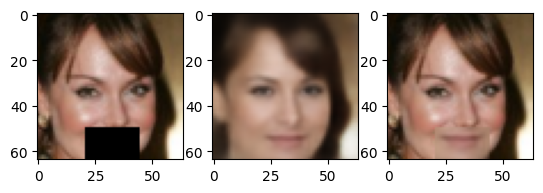

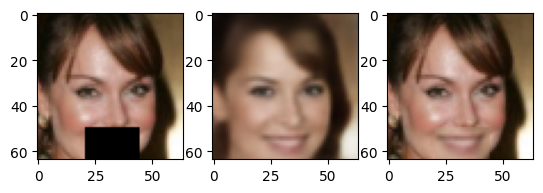

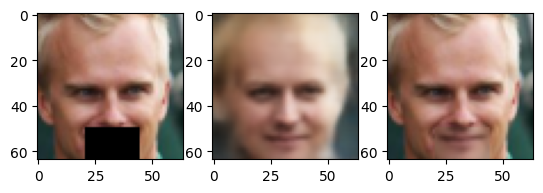

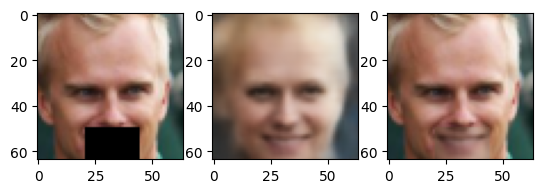

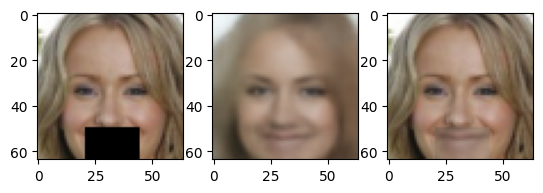

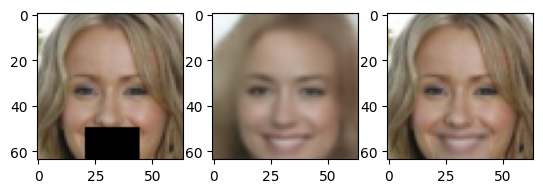

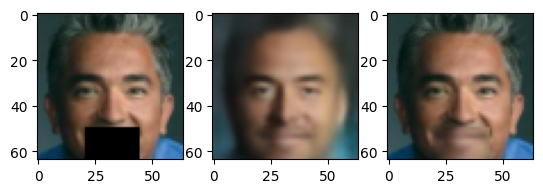

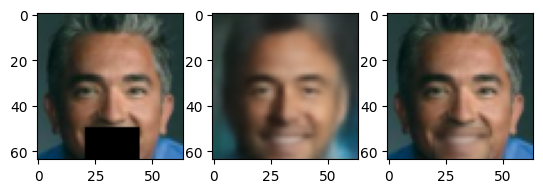

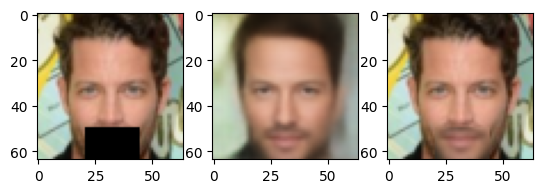

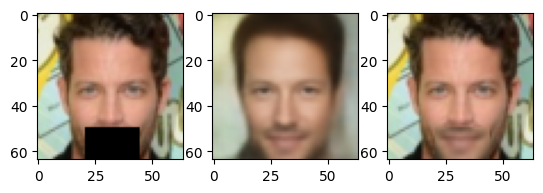

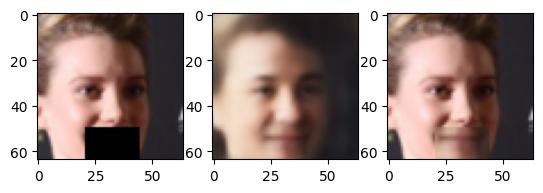

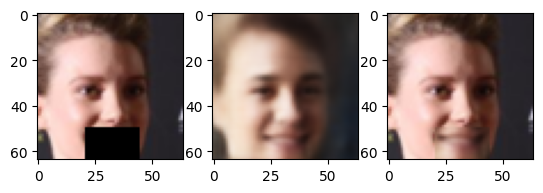

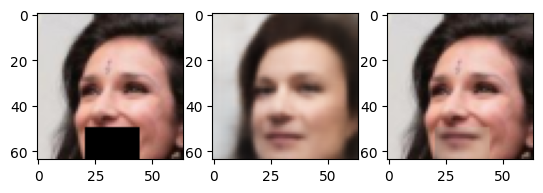

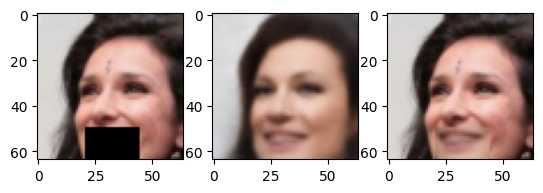

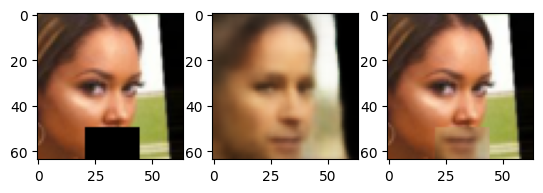

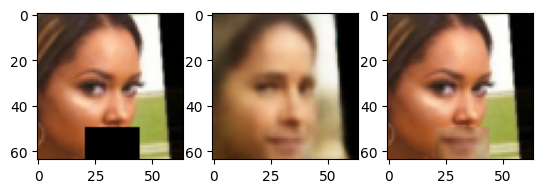

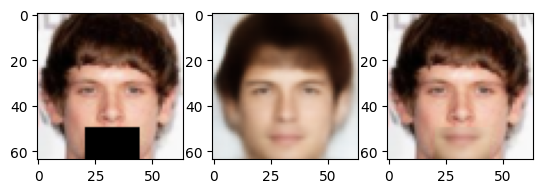

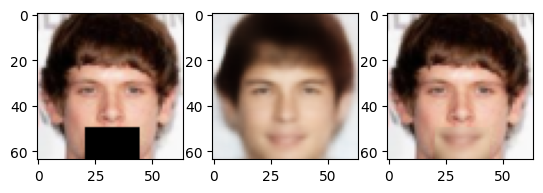

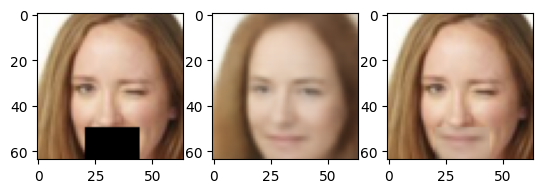

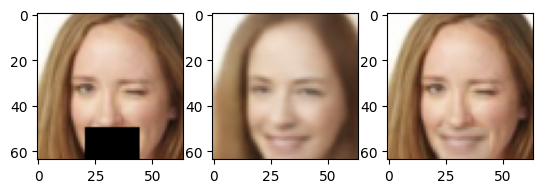

In [68]:
for img_index in [8,12,53,1256,1212,99,231,613,71316,131313]:

    #img_index = 8
    #label = 1

    x1 = 50
    y1 = 21
    x2 = 65
    y2 = 45
    deletion = DeleteRectangle(x1,y1,x2-x1,y2-y1)
    #deletion = DeleteRandomRectangle()

    display_reconstruction(baseline, img_index, 0, deletion)
    display_reconstruction(baseline, img_index, 1, deletion)
    #display_reconstruction(fineTuned, img_index, label, deletion)